# Atividades FIS01210 - Unidade I -Semestre 2022/2
Nome : Camila Raupp

Cartão : 00324582

In [2]:
%matplotlib inline
import math
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from scipy import integrate

## Atividade 1 - Função densidade de probabilidade

In [112]:
# Funções de onda

def psi0(x):
    return (2*np.pi)**-0.25*np.exp(-2*np.abs(x-1))/np.sqrt(0.399*0.5)

def psi1(x):
    return (5)*np.sin(3*x)*np.exp(-np.sqrt(abs(5*x)))

def psi2(x):
    return np.exp(-0.25*x**2)/np.pi
    
def psi3(x):
    return 5*np.exp(-2*x**2)*(x+1)*(x-1)

def psi4(x):
    return x*np.exp(-(x+2)**2)

def psi5(x):
    return np.exp(-x**2)

<ipython-input-113-a1fde5127f7d>:5: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(x2mean-xmean**2)


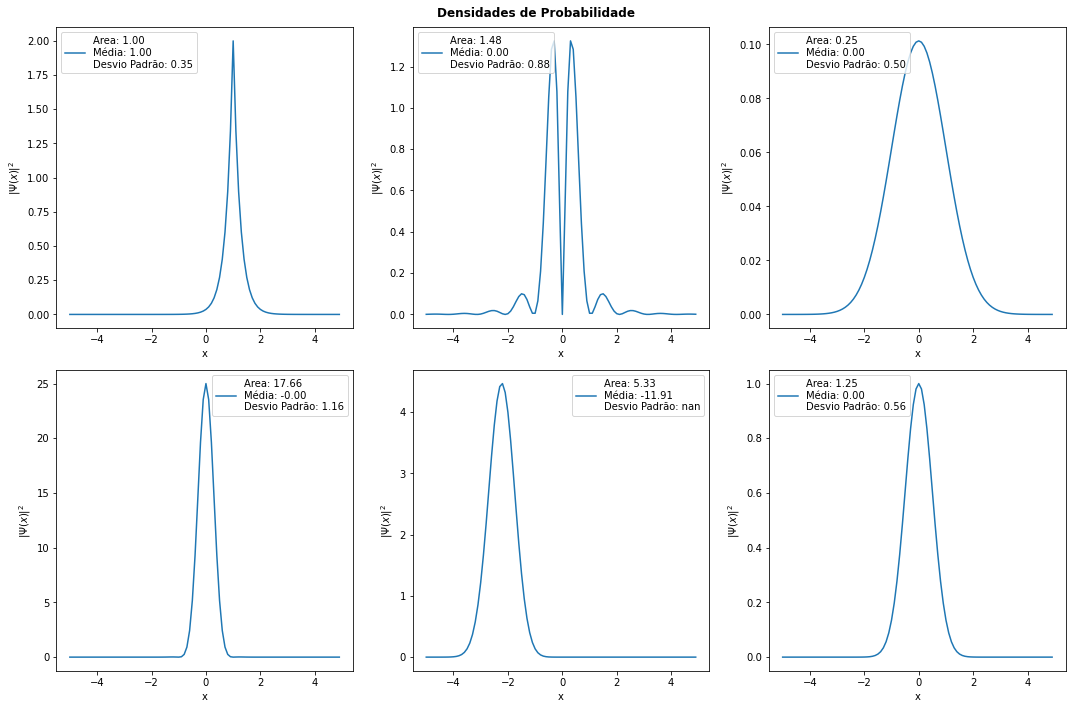

In [113]:
def stats(x, psi):
    area,err = integrate.quad(lambda x :psi(x)**2,-np.inf,np.inf)
    xmean,err = integrate.quad(lambda x :x*psi(x)**2,-np.inf,np.inf)
    x2mean,err = integrate.quad(lambda x :x**2*psi(x)**2,-np.inf,np.inf)
    sigma = np.sqrt(x2mean-xmean**2)
    
    return area, xmean, sigma

x = np.arange(-5, 5, 0.1)

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(15,10))

a, m, s = stats(x, psi0)
ax0.plot(x, psi0(x)**2, label=f'Area: {a:.2f}\nMédia: {m:.2f}\nDesvio Padrão: {s:.2f}')
ax0.set_xlabel('x')
ax0.set_ylabel('$|\Psi(x)|^2$')
ax0.legend()
#ax0.set_title(r'$\frac{exp(-2 |x-1|)}{\sqrt[4]{2 \pi} \sqrt{0.399*0.5}}$')

a, m, s = stats(x, psi1)
ax1.plot(x, psi1(x)**2, label=f'Area: {a:.2f}\nMédia: {m:.2f}\nDesvio Padrão: {s:.2f}')
ax1.set_xlabel('x')
ax1.set_ylabel('$|\Psi(x)|^2$')
ax1.legend()
#ax1.set_title(r'$\frac{exp(-2 |x-1|)}{\sqrt[4]{2 \pi} \sqrt{0.399*0.5}}$')

a, m, s = stats(x, psi2)
ax2.plot(x, psi2(x)**2, label=f'Area: {a:.2f}\nMédia: {m:.2f}\nDesvio Padrão: {s:.2f}')
ax2.set_xlabel('x')
ax2.set_ylabel('$|\Psi(x)|^2$')
ax2.legend()
#ax2.set_title(r'$\frac{exp(-2 |x-1|)}{\sqrt[4]{2 \pi} \sqrt{0.399*0.5}}$')

a, m, s = stats(x, psi3)
ax3.plot(x, psi3(x)**2, label=f'Area: {a:.2f}\nMédia: {m:.2f}\nDesvio Padrão: {s:.2f}')
ax3.set_xlabel('x')
ax3.set_ylabel('$|\Psi(x)|^2$')
ax3.legend()
#ax3.set_title(r'$\frac{exp(-2 |x-1|)}{\sqrt[4]{2 \pi} \sqrt{0.399*0.5}}$')

a, m, s = stats(x, psi4)
ax4.plot(x, psi4(x)**2, label=f'Area: {a:.2f}\nMédia: {m:.2f}\nDesvio Padrão: {s:.2f}')
ax4.set_xlabel('x')
ax4.set_ylabel('$|\Psi(x)|^2$')
ax4.legend()
#ax4.set_title(r'$\frac{exp(-2 |x-1|)}{\sqrt[4]{2 \pi} \sqrt{0.399*0.5}}$')

a, m, s = stats(x, psi5)
ax5.plot(x, psi5(x)**2, label=f'Area: {a:.2f}\nMédia: {m:.2f}\nDesvio Padrão: {s:.2f}')
ax5.set_xlabel('x')
ax5.set_ylabel('$|\Psi(x)|^2$')
ax5.legend()
#ax5.set_title(r'$\frac{exp(-2 |x-1|)}{\sqrt[4]{2 \pi} \sqrt{0.399*0.5}}$')


fig.suptitle('Densidades de Probabilidade', fontweight='bold')
fig.tight_layout()

plt.show()




## Atividade 2 - O mesmo para psi complexo

area = 1.000
média = 0.000
desvio padrão = 1.000


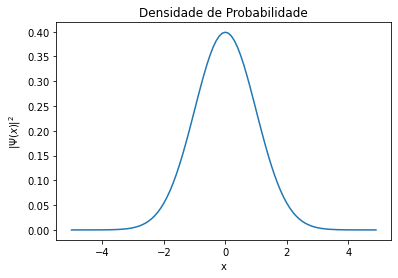

In [6]:

def psi(x):
    r = (2*np.pi)**-0.25*np.exp(-x**2/4)
    return complex(r*np.cos(np.pi/3*x),r*np.sin(np.pi/3*x))

def prob_dens(x):
    z = psi(x)
    return z.real**2 + z.imag**2
x_arr = np.arange(-5,5,0.1)
pp=[]
for x in x_arr:
    pp.append(prob_dens(x))
plt.plot(x_arr,pp)
plt.title('Densidade de Probabilidade')
plt.xlabel('x')
plt.ylabel('$|\Psi(x)|^2$')

area,err = integrate.quad(lambda x :prob_dens(x),-np.inf,np.inf)
xmean,err = integrate.quad(lambda x :x*prob_dens(x),-np.inf,np.inf)
x2mean,err = integrate.quad(lambda x :x**2*prob_dens(x),-np.inf,np.inf)
delta_x = np.sqrt(x2mean-xmean**2)
print ('area = {:.3f}'.format(area))
print ('média = {:.3f}'.format(xmean))
print ('desvio padrão = {:.3f}'.format(delta_x))


### Calculando a transformada de Fourier

area = 1.000
média = 1.047
desvio padrão = 0.500


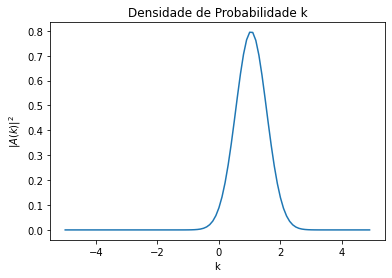

In [7]:

def A(k):
    def integrando1(x):
        z = psi(x)
        return z.real*np.cos(k*x)-z.imag*np.sin(-k*x)
    
    def integrando2(x):
        z = psi(x)
        return z.real*np.sin(-k*x)+z.imag*np.cos(k*x) 
    
    A1,err1 = integrate.quad(integrando1,-np.inf,np.inf)
    A2,err2 = integrate.quad(integrando2,-np.inf,np.inf) 
    return complex(A1/(np.sqrt(2*np.pi)),A2/(np.sqrt(2*np.pi)))

def prob_dens_fourier(k):
    z = A(k)
    return (z.real**2 + z.imag**2)

dk = 0.1
k_arr = np.arange(-5,5,0.1)
pp_fourier=[]

for k in k_arr:
    pp_fourier.append(prob_dens_fourier(k))
    
plt.plot(k_arr,pp_fourier)
plt.title('Densidade de Probabilidade k')
plt.xlabel('k')
plt.ylabel('$|A(k)|^2$')

area = np.sum(pp_fourier)*dk
kmean = np.sum(k_arr*pp_fourier)*dk
k2mean = np.sum(k_arr**2*pp_fourier)*dk
delta_k = np.sqrt(k2mean-kmean**2)

print ('area = {:.3f}'.format(area))
print ('média = {:.3f}'.format(kmean))
print ('desvio padrão = {:.3f}'.format(math.sqrt(k2mean-kmean**2)))


## Atividade 3:  Mostrar com exemplos que $\Delta x \Delta k \ge \frac{1}{2}$

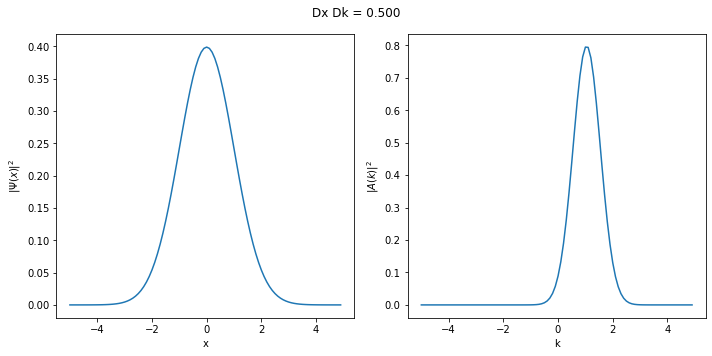

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(x_arr,pp)
ax2.plot(k_arr,pp_fourier)
ax1.set(xlabel='x', ylabel='$|\Psi(x)|^2$')
ax2.set(xlabel='k', ylabel='$|A(k)|^2$')
plt.suptitle('Dx Dk = {:.3f}'.format(delta_x*delta_k))
fig.tight_layout()

plt.show()